Part of [iPyMacLern](http://ekaakurniawan.github.io/iPyMacLern/) project.

> Copyright (C) 2016 by Eka A. Kurniawan
> 
> eka.a.kurniawan(ta)gmail(tod)com
> 
> This program is free software: you can redistribute it and/or modify
> it under the terms of the GNU General Public License as published by
> the Free Software Foundation, either version 3 of the License, or
> (at your option) any later version.
> 
> This program is distributed in the hope that it will be useful,
> but WITHOUT ANY WARRANTY; without even the implied warranty of
> MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
> GNU General Public License for more details.
> 
> You should have received a copy of the GNU General Public License
> along with this program.  If not, see <http://www.gnu.org/licenses/>.

### Display Settings

In [1]:
# Display graph inline
%matplotlib inline

# Display graph in 'retina' format for Mac with retina display. Others, use PNG or SVG format.
%config InlineBackend.figure_format = 'retina'
#%config InlineBackend.figure_format = 'PNG'
#%config InlineBackend.figure_format = 'SVG'

### Tested On

In [2]:
import sys
print("Python %d.%d.%d" % (sys.version_info.major, \
                           sys.version_info.minor, \
                           sys.version_info.micro))

Python 3.5.2


In [3]:
import numpy as np
print("NumPy %s" % np.__version__)

NumPy 1.11.1


In [4]:
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib %s" % matplotlib.__version__)

matplotlib 1.5.1


In [5]:
import scipy
import scipy.io as sio
print("SciPy %s" % scipy.__version__)

SciPy 0.18.0


---

# Table of Contents

- [Plots](#Plots)
- [Dataset](#Dataset)
- [Model](#Model)
- [Learning Algorithm](#Learning-Algorithm)
- [Training](#Training)
- [References](#References)

---

# Plots

Plot classification boundary.

In [6]:
def plot_classification_boundary(X, w, J, labels):
    # Get indices for negative/positive labels and true/false cost (J)
    neg_label_idx = np.where(labels == False)[0]
    pos_label_idx = np.where(labels == True)[0]
    true_cost_idx = np.where(J == True)[0]
    false_cost_idx = np.where(J == False)[0]
    
    # Intersect indives for negative/positive labels to the true/false cost (J)
    neg_true_idx = np.intersect1d(neg_label_idx, true_cost_idx)
    neg_false_idx = np.intersect1d(neg_label_idx, false_cost_idx)
    pos_true_idx = np.intersect1d(pos_label_idx, true_cost_idx)
    pos_false_idx = np.intersect1d(pos_label_idx, false_cost_idx)
    
    # Plot:
    # - Negative labels with circle marker
    # - Positive labels with triangle marker
    # - True cost with green color
    # - False cost with red color
    # - Boundary in balck dashed line
    plt.scatter(X[neg_true_idx,0], X[neg_true_idx,1], marker='o', color='green', s=80)
    plt.scatter(X[neg_false_idx,0], X[neg_false_idx,1], marker='o', color='red', s=80)
    plt.scatter(X[pos_true_idx,0], X[pos_true_idx,1], marker='^', color='green', s=80)
    plt.scatter(X[pos_false_idx,0], X[pos_false_idx,1], marker='^', color='red', s=80)
    if len(w):
        plt.plot([-5.0,5.0], [(-w[2]+5*w[0])/w[1],(-w[2]-5*w[0])/w[1]], '--', color='black')

    # Limit the plot in between -1 and 1 boundary for both x and y axis.
    plt.ylim([-1.0,1.0])
    plt.xlim([-1.0,1.0])
    
    plt.show()

Plot training history.

In [7]:
def plot_training_history(ttl_errors_history, w_dist_history):
    iteration_vector = np.arange(1, len(ttl_errors_history) + 1)
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Iteration')

    if len(w_dist_history):
        ax1.plot(iteration_vector, w_dist_history, marker='o', color='blue')
        ax1.set_ylabel('Distance', color='blue')

    ax2 = ax1.twinx()
    ax2.plot(iteration_vector, ttl_errors_history, marker='*', color='red')
    ax2.set_ylabel('Number of errors', color='red')

    plt.show()

---

# Dataset

Load dataset from MATLAB formated data.$^{[1]}$

In [8]:
dataset = sio.loadmat('dataset1.mat')

In [9]:
dataset

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, written by Octave 3.2.4, 2012-10-03 23:31:57 UTC',
 '__version__': '1.0',
 'neg_examples_nobias': array([[-0.80857143,  0.8372093 ],
        [ 0.35714286,  0.85049834],
        [-0.75142857, -0.73089701],
        [-0.3       ,  0.12624585]]),
 'pos_examples_nobias': array([[ 0.87142857,  0.62458472],
        [-0.02      , -0.92358804],
        [ 0.36285714, -0.31893688],
        [ 0.88857143, -0.87043189]]),
 'w_gen_feas': array([[ 4.3496526 ],
        [-2.60997235],
        [-0.69414749]]),
 'w_init': array([[-0.62170147],
        [ 0.76091527],
        [ 0.77187205]])}

### Features

Get total features.

In [10]:
ttl_features = dataset['neg_examples_nobias'].shape[1]
print("Total features: ", ttl_features)

Total features:  2


### Negative Examples and Labels

Multiple examples of two input variables (without bias) under negative class (target output is 0).

In [11]:
neg_examples_nobias = dataset['neg_examples_nobias']

In [12]:
neg_examples_nobias

array([[-0.80857143,  0.8372093 ],
       [ 0.35714286,  0.85049834],
       [-0.75142857, -0.73089701],
       [-0.3       ,  0.12624585]])

In [13]:
ttl_neg_examples = neg_examples_nobias.shape[0]
print("Total negative examples: ", ttl_neg_examples)

Total negative examples:  4


Construct negative examples with bias.

In [14]:
neg_examples = np.hstack([neg_examples_nobias, np.ones((ttl_neg_examples, 1))])

In [15]:
neg_examples

array([[-0.80857143,  0.8372093 ,  1.        ],
       [ 0.35714286,  0.85049834,  1.        ],
       [-0.75142857, -0.73089701,  1.        ],
       [-0.3       ,  0.12624585,  1.        ]])

Construct negative labels.

In [16]:
neg_labels = np.zeros(ttl_neg_examples, dtype=bool)

In [17]:
neg_labels

array([False, False, False, False], dtype=bool)

### Positive Examples and Labels

Multiple examples of two input variables (without bias) under positive class (target output is 1).

In [18]:
pos_examples_nobias = dataset['pos_examples_nobias']

In [19]:
pos_examples_nobias

array([[ 0.87142857,  0.62458472],
       [-0.02      , -0.92358804],
       [ 0.36285714, -0.31893688],
       [ 0.88857143, -0.87043189]])

In [20]:
ttl_pos_examples = pos_examples_nobias.shape[0]
print("Total positive examples: ", ttl_pos_examples)

Total positive examples:  4


Construct positive examples with bias.

In [21]:
pos_examples = np.hstack([pos_examples_nobias, np.ones((ttl_pos_examples, 1))])

In [22]:
pos_examples

array([[ 0.87142857,  0.62458472,  1.        ],
       [-0.02      , -0.92358804,  1.        ],
       [ 0.36285714, -0.31893688,  1.        ],
       [ 0.88857143, -0.87043189,  1.        ]])

Construct positive labels.

In [23]:
pos_labels = np.ones(ttl_pos_examples, dtype=bool)

In [24]:
pos_labels

array([ True,  True,  True,  True], dtype=bool)

### Combined Examples and Labels

Combined both negative and positive examples into $x$.

In [25]:
X = np.vstack([neg_examples, pos_examples])

In [26]:
X

array([[-0.80857143,  0.8372093 ,  1.        ],
       [ 0.35714286,  0.85049834,  1.        ],
       [-0.75142857, -0.73089701,  1.        ],
       [-0.3       ,  0.12624585,  1.        ],
       [ 0.87142857,  0.62458472,  1.        ],
       [-0.02      , -0.92358804,  1.        ],
       [ 0.36285714, -0.31893688,  1.        ],
       [ 0.88857143, -0.87043189,  1.        ]])

Combined both negative and positive labels.

In [27]:
labels = np.hstack([neg_labels, pos_labels])

In [28]:
labels

array([False, False, False, False,  True,  True,  True,  True], dtype=bool)

### Weight

Initial weight for two input variables with bias.

In [29]:
w_init = dataset.get('w_init', None)

In [30]:
w_init

array([[-0.62170147],
       [ 0.76091527],
       [ 0.77187205]])

Get weight from initial weight or random generator.

In [31]:
if w_init is not None:
    w = np.copy(np.transpose(w_init))[0]
else:
    w = np.random.random_sample(ttl_features + 1)

In [32]:
w

array([-0.62170147,  0.76091527,  0.77187205])

### Generously Feasible Weight with Bias

Provided or expected feasible wight with bias for comparison purposes.

In [33]:
w_gen_feas = dataset.get('w_gen_feas', [])
if len(w_gen_feas):
    w_gen_feas = np.transpose(w_gen_feas)[0]

In [34]:
w_gen_feas

array([ 4.3496526 , -2.60997235, -0.69414749])

### Read Dataset

In [35]:
def read_dataset(filename):
    
    dataset = sio.loadmat(filename)
    
    ttl_features = dataset['neg_examples_nobias'].shape[1]
    
    neg_examples_nobias = dataset['neg_examples_nobias']
    ttl_neg_examples = neg_examples_nobias.shape[0]
    neg_examples = np.hstack([neg_examples_nobias, np.ones((ttl_neg_examples, 1))])
    neg_labels = np.zeros(ttl_neg_examples, dtype=bool)
    
    pos_examples_nobias = dataset['pos_examples_nobias']
    ttl_pos_examples = pos_examples_nobias.shape[0]
    pos_examples = np.hstack([pos_examples_nobias, np.ones((ttl_pos_examples, 1))])
    pos_labels = np.ones(ttl_pos_examples, dtype=bool)
    
    X = np.vstack([neg_examples, pos_examples])
    labels = np.hstack([neg_labels, pos_labels])
    
    w_init = dataset.get('w_init', None)
    if w_init is not None:
        w = np.copy(np.transpose(w_init))[0]
    else:
        w = np.random.random_sample(ttl_features + 1)
        
    w_gen_feas = dataset.get('w_gen_feas', [])
    if len(w_gen_feas):
        w_gen_feas = np.transpose(w_gen_feas)[0]
    
    return ttl_features, X, labels, w, w_gen_feas

---

# Model

### Weighted Sum Formula

Weighted sum $z$ of input neurons is calculated as follow.$^{[2,3]}$

$$z = b+\sum_{i}w_ix_i$$

Calculate weighted sum $z$.

In [36]:
Z = np.dot(X, w)
Z

array([ 1.91160744,  1.19699298,  0.6828856 ,  1.05444488,  0.70535967,
        0.08153383,  0.30359929, -0.44287904])

### Binary Threshold Neuron Model

Decision unit of output $y$ from weighted sum $z$.$^{[2,3]}$

$$
y = \left\{
\begin{array}{ll}
1 & \mbox{if $z \geq 0$}\\
0 & \mbox{otherwise}
\end{array}
\right.
$$

Output clustering $y$ using binary threshold neuron model.

In [37]:
Y = Z >= 0
Y

array([ True,  True,  True,  True,  True,  True,  True, False], dtype=bool)

In [38]:
labels

array([False, False, False, False,  True,  True,  True,  True], dtype=bool)

Evaluate cost/error/mistake $J$. True means the clustering result agrees with given label. Whereas, False means the opposite.

In [39]:
J = Y == labels
J

array([False, False, False, False,  True,  True,  True, False], dtype=bool)

Overall perceptron evaluation function.

In [40]:
def evaluate_perceptron(X, w, labels):
    Z = np.dot(X, w)  # weighted sum
    Y = Z >= 0        # binary threshold clustering
    J = Y == labels   # cost function
    
    return J

Evaluate perceptron using initial weight.

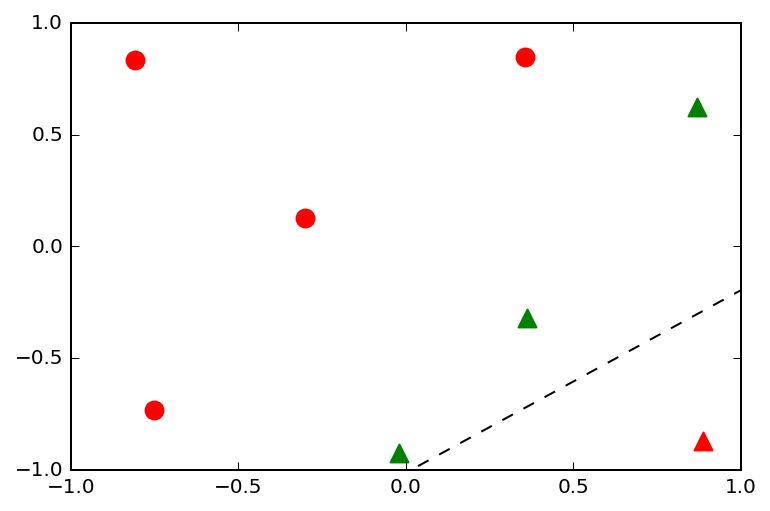

In [41]:
J = evaluate_perceptron(X, w, labels)
plot_classification_boundary(X, w, J, labels)

Evaluate perceptron using feasible weight.

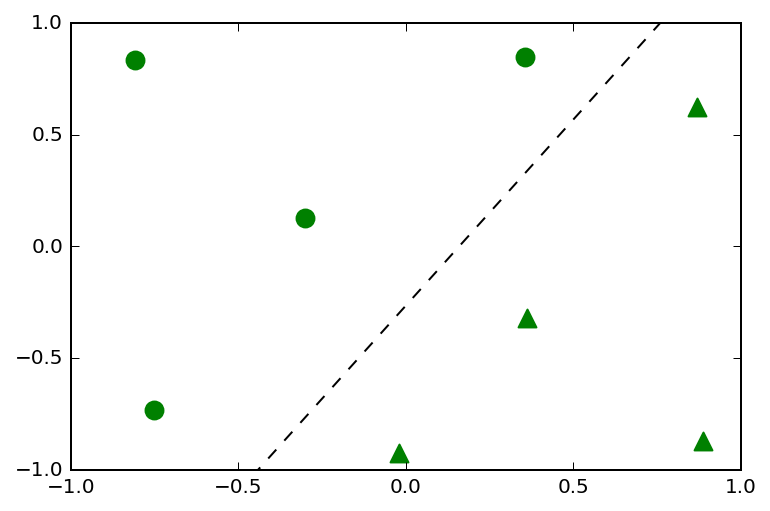

In [42]:
J = evaluate_perceptron(X, w_gen_feas, labels)
plot_classification_boundary(X, w_gen_feas, J, labels)

---

# Learning Algorithm

Perceptron learning algorithm$^{[2,3]}$:
- If output $y$ agrees with given label, keep current weight vector
- If output $y$ is 1 for label 0, substract weight vector by input vector
- If output $y$ is 0 for label 1, add input vector to weight vector

In [43]:
def update_weights(X, w, labels):
    for i, x in enumerate(X):
        z = np.dot(x,w)
        if labels[i] == False:
            if z >= 0.0:
                w = w - X[i]
        else:
            if z < 0.0:
                w = w + X[i]
            
    return w

Initial weight.

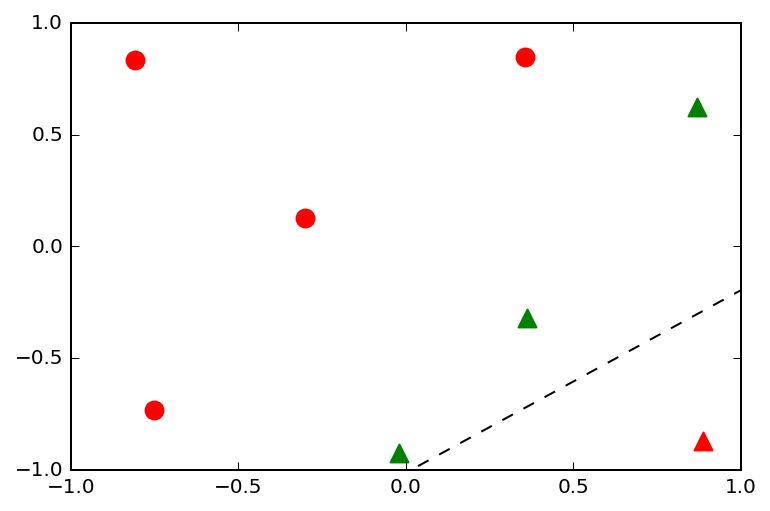

In [44]:
ttl_features, X, labels, w, w_gen_feas = read_dataset('dataset1.mat')
J = evaluate_perceptron(X, w, labels)
plot_classification_boundary(X, w, J, labels)

First iteration.

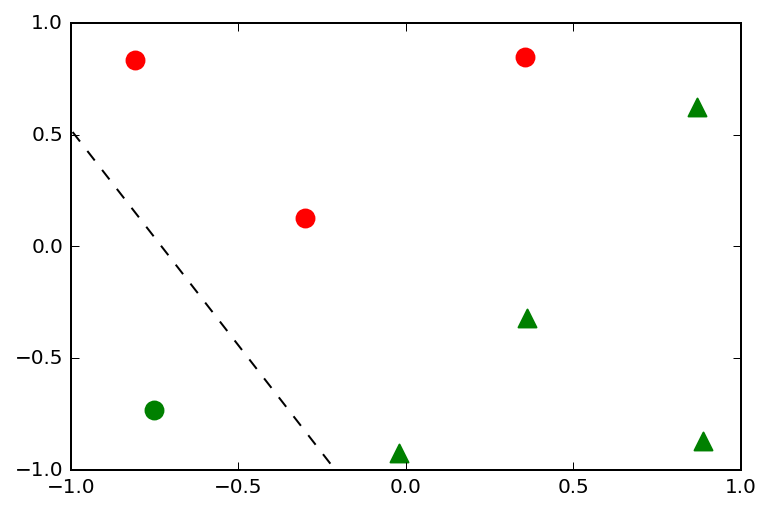

In [45]:
w = update_weights(X, w, labels)
J = evaluate_perceptron(X, w, labels)
plot_classification_boundary(X, w, J, labels)

Second iteration.

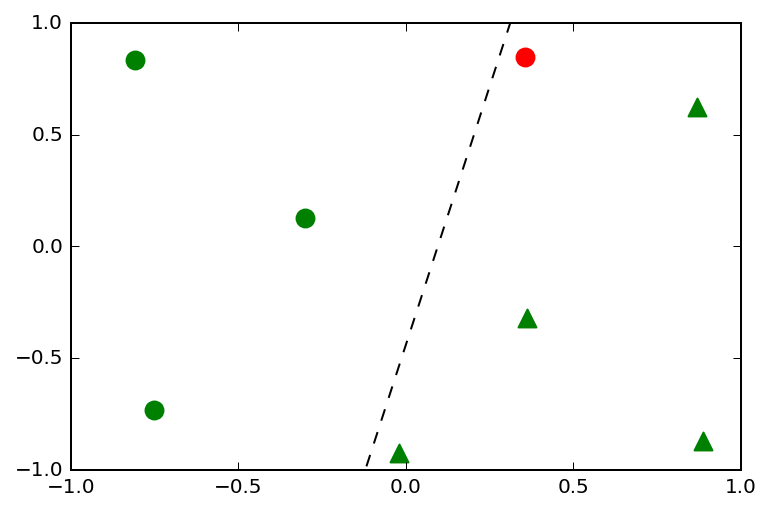

In [46]:
w = update_weights(X, w, labels)
J = evaluate_perceptron(X, w, labels)
plot_classification_boundary(X, w, J, labels)

---

# Training

In [47]:
def perform_perceptron_training(dataset_filename, max_iteration):
    ttl_features, X, labels, w, w_gen_feas = read_dataset(dataset_filename)
    ttl_labels = len(labels)

    J = evaluate_perceptron(X, w, labels)
    ttl_errors = ttl_labels - np.count_nonzero(J)
    print("Number of errors in iteration %d: %2d" % (0, ttl_errors))
    plot_classification_boundary(X, w, J, labels)

    ttl_errors_history = []
    w_dist_history = []
    for i in range(1, max_iteration):
        w = update_weights(X, w, labels)
        J = evaluate_perceptron(X, w, labels)
        ttl_errors = ttl_labels - np.count_nonzero(J)
        print("Number of errors in iteration %d: %2d" % (i, ttl_errors))
        ttl_errors_history.append(ttl_errors)
        if len(w_gen_feas):
            w_dist_history.append(np.linalg.norm(w - w_gen_feas))
        plot_classification_boundary(X, w, J, labels)
        if ttl_errors <= 0:
            break
    
    return ttl_errors_history, w_dist_history

Number of errors in iteration 0:  5


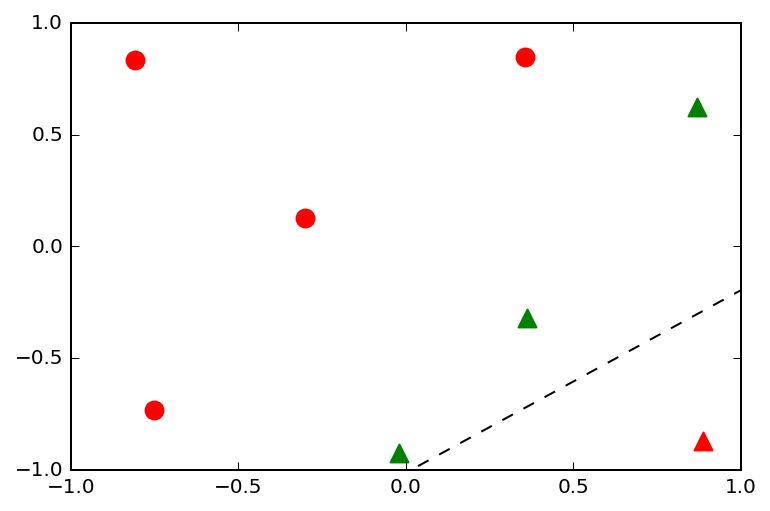

Number of errors in iteration 1:  3


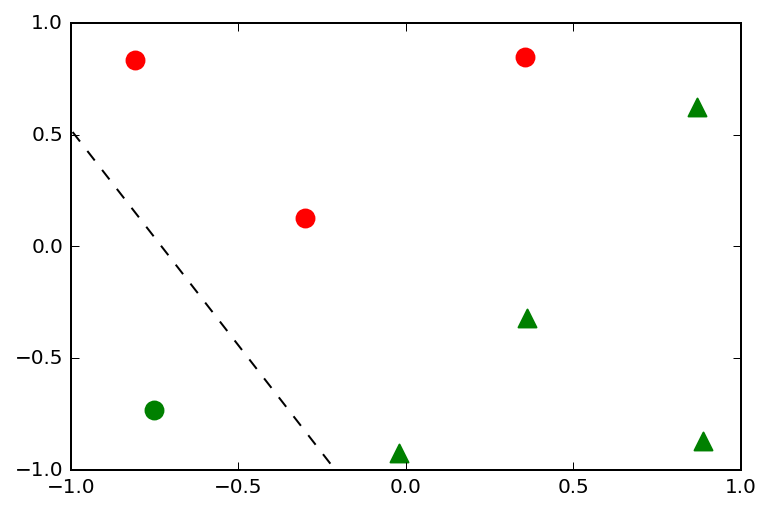

Number of errors in iteration 2:  1


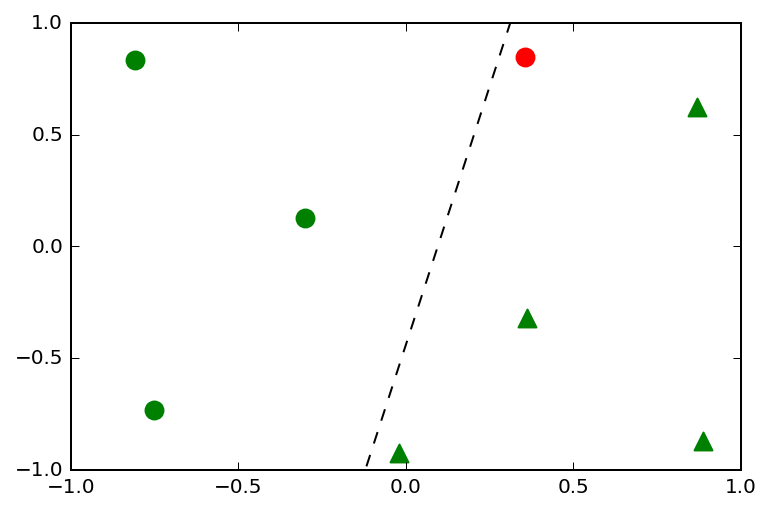

Number of errors in iteration 3:  1


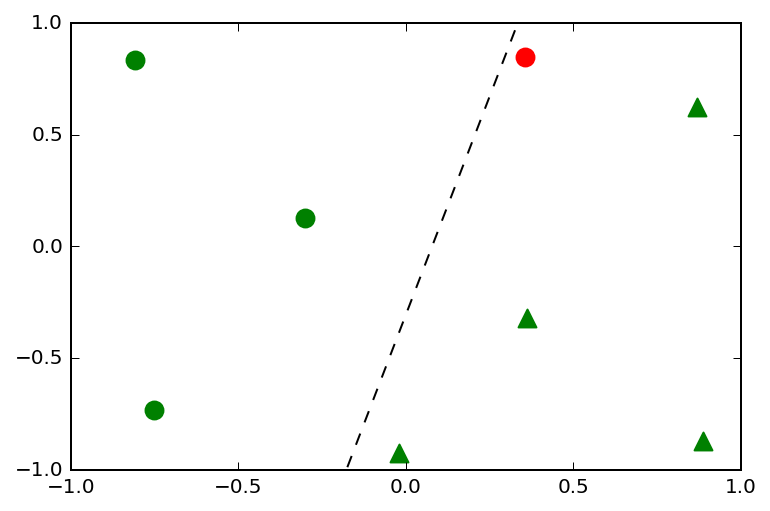

Number of errors in iteration 4:  1


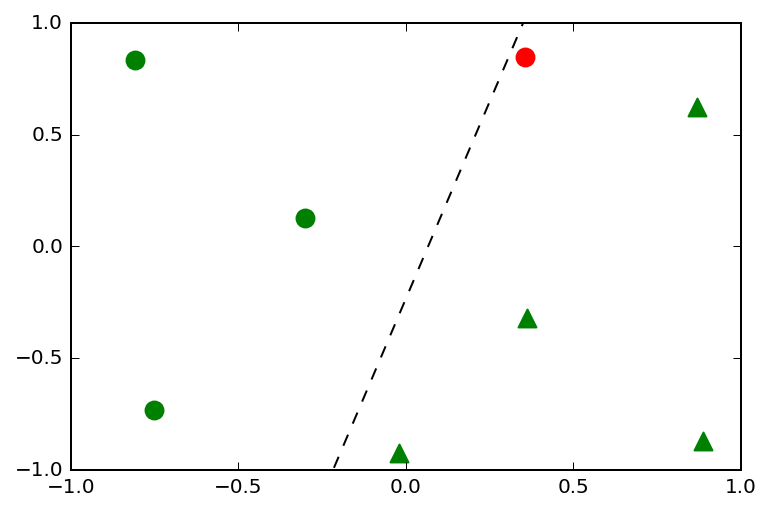

Number of errors in iteration 5:  0


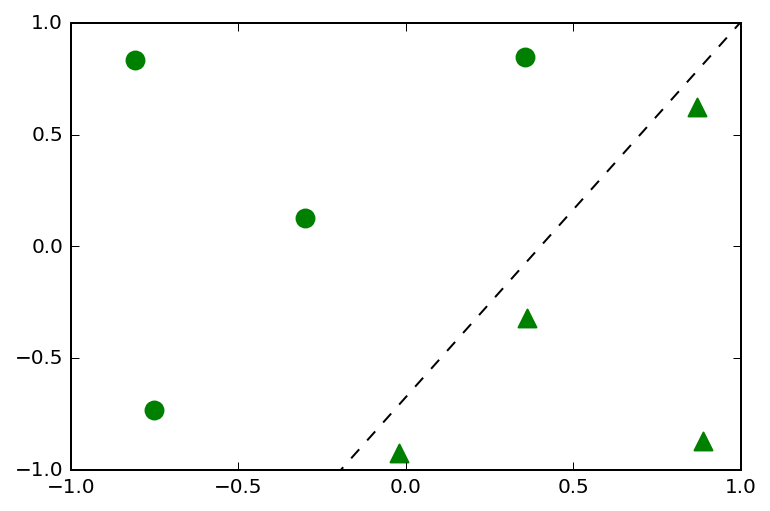

In [48]:
ttl_errors_history, w_dist_history = perform_perceptron_training('dataset1.mat', 21)

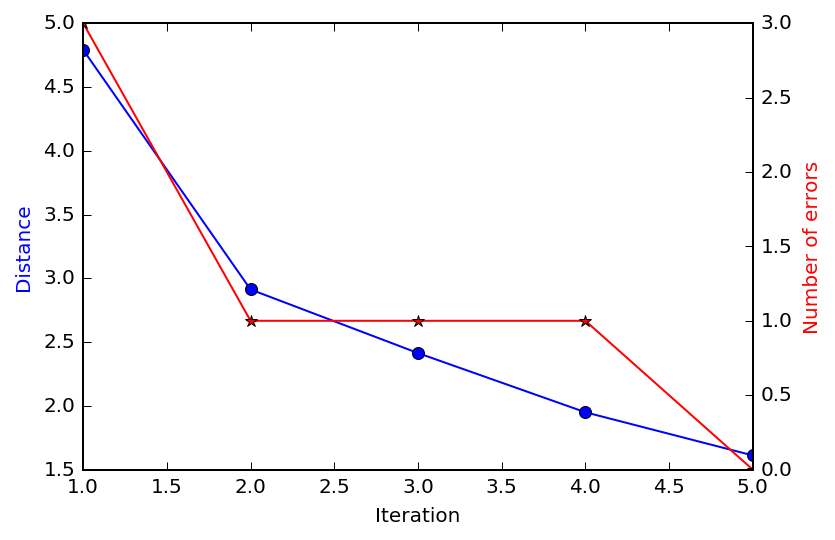

In [49]:
plot_training_history(ttl_errors_history, w_dist_history)

---

# References

1. G. Hinton, 2016. _Neural Networks for Machine Learning_. Week 3 Programming Assignment 1: The perceptron learning algorithm. University of Toronto. Coursera. https://www.coursera.org/learn/neural-networks
2. G. Hinton, 2016. _Neural Networks for Machine Learning_. Week 2: The Perceptron learning procedure. University of Toronto. Coursera. https://www.coursera.org/learn/neural-networks
3. McCulloch, W.S. & Pitts, W. _A logical calculus of the ideas immanent in nervous activity_. Bulletin of Mathematical Biophysics (1943) 5: 115. doi:10.1007/BF02478259